In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import calinski_harabaz_score
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

pd.options.display.max_columns = None

dataframe = pd.read_csv("C:\\Users\\mushr\\Desktop\\433\\England17-18.csv",encoding = 'GBK',engine='python')
# 胜负平处理

def judge_points(df):
    if df['goals'] > df['goalsLost']:
        df['points'] = 3
    elif df['goals'] == df['goalsLost']:
        df['points'] = 1
    else:
        df['points'] = 0
    return df['points']

dataframe['points'] = dataframe.apply(judge_points,axis=1)
dataframe

,aerialDuelScc,aerialsWon,assists,bigChanceCreated,clearances,dribblesWon,errorsSum,finalThirdPass,finalThirdPassAcc,fouled,fouls,goals,goalsLost,interceptions,keyPasses,offsideWon,offsides,passSucc,passes,possession,rate,redCards,shots,shotsOT,tacklesSuccful,teamId,teamName,yelCards,points
0,0.638889,23,4,3,19,23,0,154,115,7,19,4,0,11,16,4,1,0.845842,493,0.553648,7.677857,0,21,5,14,2,曼联,2,3
1,0.500000,18,4,4,30,16,1,220,172,12,9,4,3,13,25,3,5,0.851266,632,0.699786,7.307143,0,27,10,23,12,阿森纳,0,3
2,0.470588,16,2,2,29,5,0,130,69,7,19,3,0,9,6,0,2,0.650327,306,0.432577,7.233571,0,9,6,28,278,哈德斯菲尔德,3,3
3,0.483871,15,2,3,22,10,0,201,159,6,10,2,0,5,14,2,1,0.894587,702,0.731194,7.217857,0,18,6,16,3,热刺,2,3
4,0.564103,22,3,0,42,2,0,87,43,15,11,3,2,13,8,2,1,0.753125,320,0.380739,7.061538,0,10,5,8,20,伯恩利,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.550000,22,1,2,17,4,2,156,90,9,14,1,2,7,8,1,3,0.728365,416,0.513667,6.432857,0,10,4,16,20,伯恩利,0,0
756,0.694444,25,0,1,37,15,3,154,121,11,10,0,3,14,4,0,2,0.854130,569,0.580773,6.402857,0,6,2,18,1,切尔西,1,0
757,0.480000,12,0,0,14,9,1,102,64,8,11,0,2,18,4,1,1,0.791557,379,0.408393,6.392857,0,7,1,34,8,西布朗维奇,3,0
758,0.388889,14,0,3,21,11,2,120,73,10,13,1,3,17,9,4,1,0.775342,365,0.433941,6.264286,0,14,7,10,14,埃弗顿,1,0


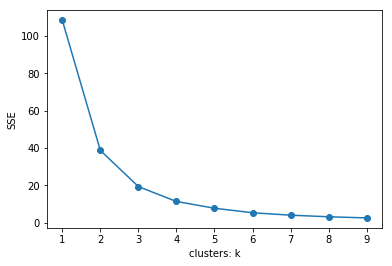

In [3]:
SSE = []
for k in range(1,10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(dataframe[['rate']])
    SSE.append(estimator.inertia_)
X = range(1,10)
plt.xlabel('clusters: k',)
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

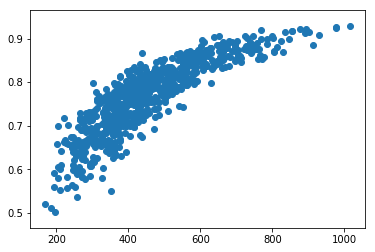

In [3]:
plt.scatter(dataframe.passes,dataframe.passSucc)

In [4]:
#转换成numpy array
df1 = dataframe[['passes','passSucc']]

model = KMeans(n_clusters=5) #创建模型
model = model.fit(df1) #训练模型
target = model.predict(df1) #对原始数据进行标注
df1

,passes,passSucc
0,493,0.845842
1,632,0.851266
2,306,0.650327
3,702,0.894587
4,320,0.753125
...,...,...
755,416,0.728365
756,569,0.854130
757,379,0.791557
758,365,0.775342


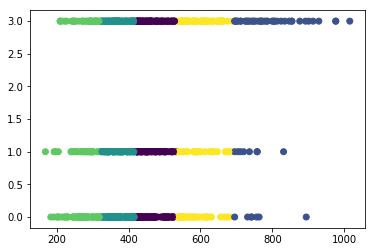

In [6]:
plt.scatter(dataframe.passes,dataframe.points,c=target)#查看聚类的分布情况

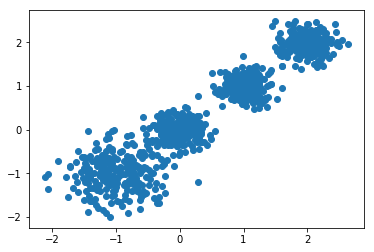

In [7]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=9)
plt.scatter(X[:, 0], X[:, 1], marker='o')  # 假设暂不知道y类别，不设置c=y，使用kmeans聚类
plt.show()

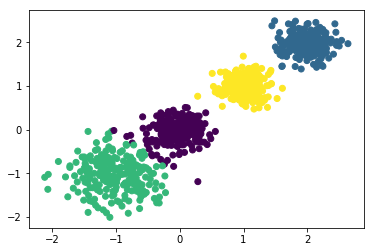

5924.050613480169


D:\python3.6\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print(metrics.calinski_harabaz_score(X, y_pred))

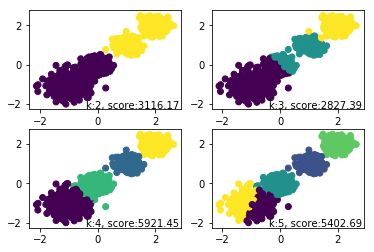

In [19]:
for index, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, index + 1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size=200, random_state=9).fit_predict(X)
    score = metrics.calinski_harabasz_score(X, y_pred)
    # score = metrics.calinski_harabaz_score(X, y_pred)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k:%d, score:%.2f' % (k, score)), transform=plt.gca().transAxes, size=10,
             horizontalalignment='right')
plt.show()


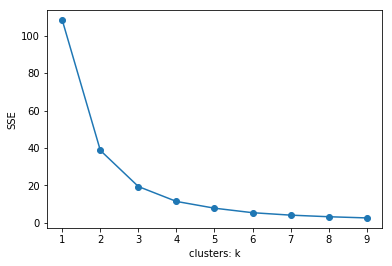

In [4]:
SSE = []
for k in range(1,10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(dataframe[['rate']])
    SSE.append(estimator.inertia_)
X = range(1,10)
plt.xlabel('clusters: k',)
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()